# Clasificación de Imágenes / Redes Neuronales / Convolucionales

# Carga de Imágenes

In [ ]:
# Creamos las carpetas para subir las imágenes

#!mkdir cat
#!mkdir dog
!mkdir PetImages

# Subimos los archivos .zip en cada carpeta

In [ ]:
# Descomprimimos los archivos .zip

%cd /content/PetImages
!unzip Cat.zip
%cd ..

%cd /content/PetImages
!unzip Dog.zip
%cd ..

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Dog/55.jpg              
  inflating: Dog/550.jpg             
  inflating: Dog/5500.jpg            
  inflating: Dog/5501.jpg            
  inflating: Dog/5502.jpg            
  inflating: Dog/5503.jpg            
  inflating: Dog/5504.jpg            
  inflating: Dog/5505.jpg            
  inflating: Dog/5506.jpg            
  inflating: Dog/5507.jpg            
  inflating: Dog/5508.jpg            
  inflating: Dog/5509.jpg            
  inflating: Dog/551.jpg             
  inflating: Dog/5510.jpg            
  inflating: Dog/5511.jpg            
  inflating: Dog/5512.jpg            
  inflating: Dog/5513.jpg            
  inflating: Dog/5514.jpg            
  inflating: Dog/5515.jpg            
  inflating: Dog/5516.jpg            
  inflating: Dog/5517.jpg            
  inflating: Dog/5518.jpg            
  inflating: Dog/5519.jpg            
  inflating: Dog/552.jpg             
  inflating: Dog/5520

In [ ]:
# Borramos los archivos .zip

!rm -rf /content/PetImages/Cat.zip
!rm -rf /content/PetImages/Dog.zip

In [ ]:
# Mostramos el número de imágenes porcada categoría

!ls /content/PetImages/Cat | wc -l
!ls /content/PetImages/Dog | wc -l

12500
12500


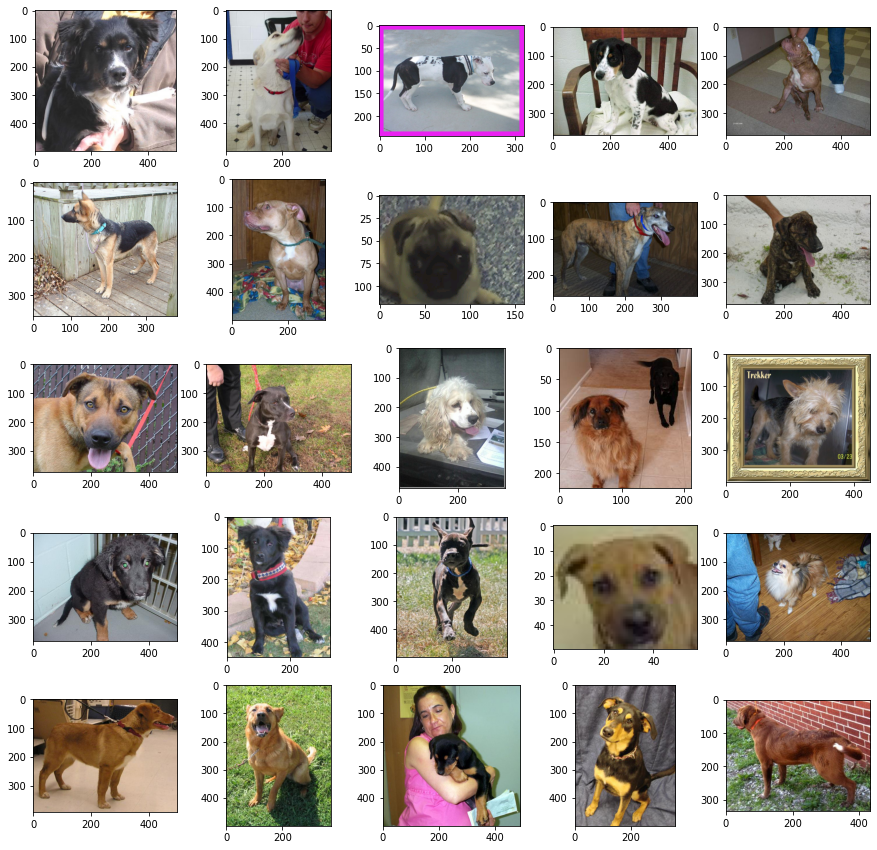

In [ ]:
# Mostramos algunas imágenes

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/PetImages/Dog'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

# Procesamiento de Imágenes

In [ ]:
# Importamos algunas librerías a utilizar

import os
import numpy as np
import tensorflow as tf
import keras

In [ ]:
# Definimos algunos parámetros

#epocas = 25
#altura, longitud= 100, 100
#batch = 32
#pasos_epoca = 32 #entrenamiento / batch = datagen_entrenamiento.image_shape[0] // batch = 625
#pasos_validacion = 157 #validacion / batch = datagen_validacion.image_shape[0] // batch = 157
#filtrosConv1 = 32
#filtrosConv2 = 64
#tamano_filtro1 = (3,3)
#tamano_filtro2 = (2,2)
#tamano_pool = (2,2)
#clases = 3
#lr = 0.0005

In [ ]:
# Aumentamos los datos con ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Generamos los sets de entrenamiento y validación

altura, longitud= 100, 100
batch = 32

datagen_entrenamiento = datagen.flow_from_directory(
    '/content/PetImages',
    target_size=(altura, longitud),
    batch_size=batch,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

datagen_validacion = datagen.flow_from_directory(
    '/content/PetImages',
    target_size=(altura, longitud),
    batch_size=batch,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Validamos el tamaño de los datos

datagen_entrenamiento.image_shape

(100, 100, 3)

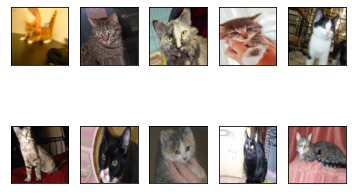

In [ ]:
# Mostramos algunas imágenes de entrenamiento

for imagen, etiqueta in datagen_validacion:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

# Modelado de la CNN

In [ ]:
# Definimos el modelo Secuencial

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3,3)
tamano_filtro2 = (2,2)
tamano_pool = (2,2)
clases = 2

model = Sequential()

# 1a capa Convolucional con MaxPooling
model.add(Conv2D(filtrosConv1, tamano_filtro1, padding='same', input_shape=(altura, longitud, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=tamano_pool))

# 2a capa Convolucional con MaxPooling
model.add(Conv2D(filtrosConv2, tamano_filtro2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=tamano_pool))

# 1a capa Densa con aplanado y Dropout
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Capa Densa de salida
model.add(Dense(clases, activation='softmax'))

In [ ]:
# Obtenemos un resumen del modelo

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 40000)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

In [ ]:
# Compilamos el modelo

lr = 0.0005

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Definimos el Callbacks EarlyStopping

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
)

In [ ]:
# Ajustamos el modelo

from keras import callbacks

epocas = 25
pasos_epoca = 32 #entrenamiento / batch
pasos_validacion = 100 #validacion / batch

historial = model.fit(
    datagen_entrenamiento,
    steps_per_epoch=pasos_epoca,
    epochs=epocas,
    validation_data=datagen_validacion,
    validation_steps=pasos_validacion,
    callbacks=[early_stop]
)

Epoch 1/25
32/32 [==============================] - 57s 2s/step - loss: 1.7218 - accuracy: 0.4863 - val_loss: 0.6849 - val_accuracy: 0.6837
Epoch 2/25
32/32 [==============================] - 55s 2s/step - loss: 0.6798 - accuracy: 0.5498 - val_loss: 0.6520 - val_accuracy: 0.7550
Epoch 3/25
32/32 [==============================] - 53s 2s/step - loss: 0.6770 - accuracy: 0.5566 - val_loss: 0.6381 - val_accuracy: 0.7731
Epoch 4/25
32/32 [==============================] - 53s 2s/step - loss: 0.6654 - accuracy: 0.6172 - val_loss: 0.6046 - val_accuracy: 0.7125
Epoch 5/25
32/32 [==============================] - 53s 2s/step - loss: 0.6573 - accuracy: 0.6113 - val_loss: 0.6458 - val_accuracy: 0.6581
Epoch 6/25
32/32 [==============================] - 53s 2s/step - loss: 0.6276 - accuracy: 0.6553 - val_loss: 0.5502 - val_accuracy: 0.7894
Epoch 7/25
32/32 [==============================] - 53s 2s/step - loss: 0.6272 - accuracy: 0.6514 - val_loss: 0.5850 - val_accuracy: 0.7378
Epoch 8/25
32/32 [==

# Evaluación del Modelo

In [ ]:
# Obtenemos las métricas del modelo

score = model.evaluate(datagen_validacion, steps=pasos_validacion)
print("Loss Validacion: {}\nAccuracy Validacion: {}".format(score[0], score[1]))

100/100 [==============================] - 29s 292ms/step - loss: 0.6376 - accuracy: 0.6472
Loss Validacion: 0.6375827789306641
Accuracy Validacion: 0.6471874713897705


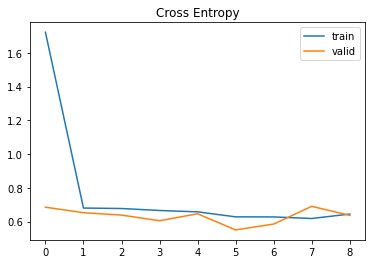

In [ ]:
# Graficamos la evolución de la pérdida en el modelo

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

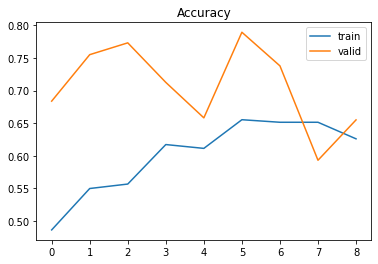

In [ ]:
# Graficamos la evolución del accuracy en el modelo

plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

In [ ]:
# Guardamos el modelo

model.save('cats_dogs_model_v1.h5')

In [ ]:
# Descargamos el modelo

from keras.models import load_model

model = load_model('cats_dogs_model_v1.h5')
model.get_weights()

[array([[[[-0.05054411,  0.08246205, -0.1296831 , -0.00256213,
            0.0016375 ,  0.02795695, -0.07921936, -0.07774224,
            0.07457496, -0.12014236, -0.12983657, -0.01047632,
            0.08462998,  0.05266807, -0.09009419,  0.13424054,
            0.10217883,  0.10292386, -0.04303869, -0.09436197,
           -0.12471731, -0.09678974,  0.08476387,  0.00365338,
            0.09256797,  0.02314592,  0.05128781, -0.09047996,
           -0.12354983,  0.06657714, -0.07324953,  0.03245564],
          [ 0.07941595, -0.15209611,  0.04685956, -0.03080774,
            0.10130209,  0.08044371, -0.09398859,  0.11917713,
           -0.03030091,  0.01719682, -0.12174788,  0.07482169,
           -0.04595522, -0.01794088, -0.08526868,  0.08696254,
           -0.07799006, -0.10421316,  0.09649481,  0.05664692,
            0.05955462,  0.01175615, -0.04784061,  0.10260948,
            0.01431311,  0.02045758, -0.06082642,  0.02123031,
            0.11523921, -0.09059636,  0.08254221,  0.0